## Environmental data
- Using hourly ERA5 land data - 0.1 x 0.1 degree resolution: https://cds.climate.copernicus.eu/datasets/derived-era5-land-daily-statistics?tab=overview
    - Variables: 
        - 2m temperature, 
        - 10m u and v wind components
        - total precipitation
        - leaf area index, high vegetation
        - leaf area index, low vegetation
    - Spacial extent: bounding box of los angeles and neighboring forests/parks (http://bboxfinder.com/#34.053039,-118.952181,34.823302,-117.444077)
        - x_min: -118.952181
        - y_min: 34.053039
        - x_max: -117.444077
        - y_max: 34.823302
    - Temporal extent: All hours of all days of January 2025

In [ ]:
# API request for the data
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": [
        "2m_dewpoint_temperature",
        "10m_u_component_of_wind",
        "10m_v_component_of_wind",
        "total_precipitation",
        "leaf_area_index_high_vegetation",
        "leaf_area_index_low_vegetation"
    ],
    "year": "2025",
    "month": "01",
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [34.823302, -118.952181, 34.053039, -117.444077]
}

# Comment these lines after you get the data (don't uncomment if data already there)

# client = cdsapi.Client()
# client.retrieve(dataset, request).download()

In [1]:
import xarray as xr

data = xr.open_dataset("../environmental_data/data_0.nc")

In [3]:
data

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 744, latitude: 8, longitude: 16)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2025-01-01 ... 2025-01-31T23:...
  * latitude    (latitude) float64 64B 34.75 34.65 34.55 ... 34.25 34.15 34.05
  * longitude   (longitude) float64 128B -119.0 -118.9 -118.8 ... -117.6 -117.5
    expver      (valid_time) <U4 12kB ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 381kB ...
    u10         (valid_time, latitude, longitude) float32 381kB ...
    v10         (valid_time, latitude, longitude) float32 381kB ...
    tp          (valid_time, latitude, longitude) float32 381kB ...
    lai_hv      (valid_time, latitude, longitude) float32 381kB ...
    lai_lv      (valid_time, latitude, longitude) float32 381kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-18T21:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
data.latitude.values, data.longitude.values

(array([34.754, 34.654, 34.554, 34.454, 34.354, 34.254, 34.154, 34.053]),
 array([-118.953     , -118.85293333, -118.75286667, -118.6528    ,
        -118.55273333, -118.45266667, -118.3526    , -118.25253333,
        -118.15246667, -118.0524    , -117.95233333, -117.85226667,
        -117.7522    , -117.65213333, -117.55206667, -117.452     ]))

In [9]:
lat = data['latitude'].values
lon = data['longitude'].values
lat.shape, lon.shape

((8,), (16,))

In [10]:
import numpy as np

lon_mesh, lat_mesh = np.meshgrid(lon, lat)

In [ ]:
temp2m = data['d2m'].values # d2m = dewpoint 2m temperature (degrees K)
temp2m.shape # looks like the temporal dimension is in terms of hours; there's 744 hours because the data contains data for all of January; 31 * 24 = 744

(744, 8, 16)

In [ ]:
temp2m_f = (temp2m - 273.15) * 9/5 + 32 # convert to degrees F

In [13]:
temp2m_f

array([[[32.897198 , 32.536846 , 32.360188 , ..., 27.816242 ,
         27.81712  , 28.239874 ],
        [31.744074 , 31.418879 , 30.666534 , ..., 27.371515 ,
         28.118586 , 28.558918 ],
        [32.83304  , 31.460186 , 30.681477 , ..., 26.584015 ,
         27.360968 , 28.50091  ],
        ...,
        [45.952473 , 44.32298  , 42.50628  , ..., 25.372883 ,
         25.826397 , 27.707256 ],
        [48.314972 , 49.284405 , 47.47298  , ..., 29.347296 ,
         29.789387 , 29.53714  ],
        [       nan, 50.68802  , 50.54124  , ..., 35.479424 ,
         34.71214  , 34.42386  ]],

       [[33.979134 , 34.411552 , 34.765755 , ..., 29.337627 ,
         29.019464 , 28.906086 ],
        [32.973663 , 33.40169  , 32.675713 , ..., 28.632746 ,
         29.328838 , 29.226887 ],
        [34.22347  , 32.523663 , 31.748468 , ..., 27.536749 ,
         28.27591  , 29.339386 ],
        ...,
        [47.38421  , 45.612335 , 44.04173  , ..., 26.73255  ,
         27.073566 , 28.947393 ],
        [49.

In [14]:
precip = data['tp'].values
veg_high = data['lai_hv'].values

In [20]:
# df = data.to_dataframe()

In [ ]:
# flatten 2d arrays into 1d so that they can be plotted

lat_flat = lat_mesh.flatten()
lon_flat = lon_mesh.flatten()

In [ ]:
import datetime

base_day = datetime.date(year=2025, month=1, day=1)

target_day = datetime.date(year=2025, month=1, day=9) # day of fire in palisades https://en.wikipedia.org/wiki/January_2025_Southern_California_wildfires
target_hour = 12 # treat as 24h value, so from 0 to 23

day_delta =  target_day - base_day
hour_idx = day_delta.days * 24 + target_hour # hour offset relative to January 1, 2025 at time 0:00 am

hour_idx

204

In [ ]:
# flatten 2d arrays into 1d so that they can be plotted
temp_flat = temp2m_f[hour_idx].flatten()
precip_flat = precip[hour_idx].flatten()
veg_high_flat = veg_high[hour_idx].flatten()

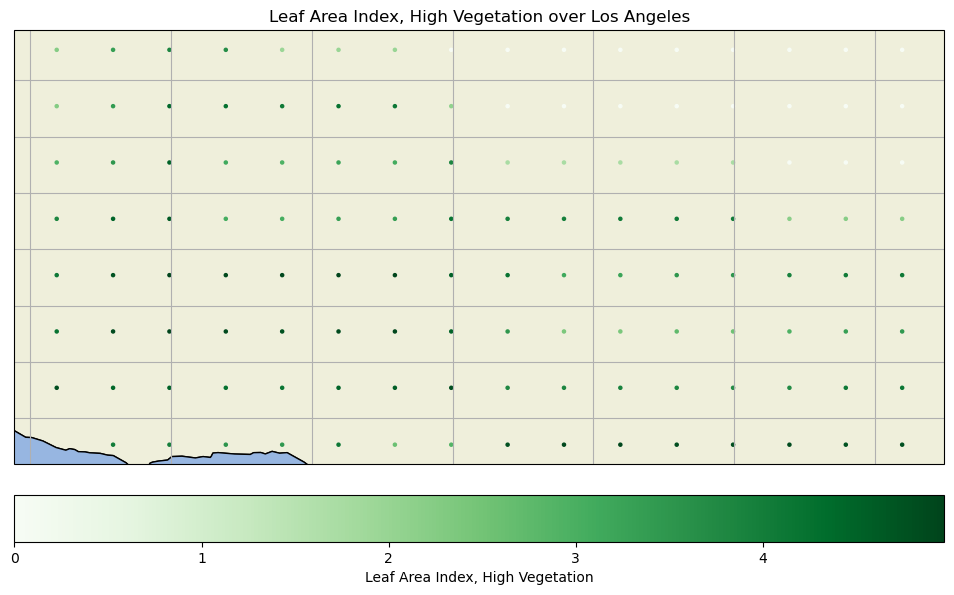

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot with a world map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Plot the points
scatter = ax.scatter(lon_flat, lat_flat, c=veg_high_flat,
                     cmap='Greens', s=5, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.05)
cbar.set_label('Leaf Area Index, High Vegetation')

# Set the title
ax.set_title('Leaf Area Index, High Vegetation over Los Angeles')

# Show the plot
plt.show()